In [97]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot

df = pd.read_csv('Downloads/kaggle_multiple_choice.csv')

C:\Users\Ravi\AppData\Local\Temp\ipykernel_3164\1138602275.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Downloads/kaggle_multiple_choice.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   LearningPlatformUsefulnessArxiv              2391 non-null   object 
 1   LearningPlatformUsefulnessBlogs              4765 non-null   object 
 2   LearningPlatformUsefulnessCollege            3359 non-null   object 
 3   LearningPlatformUsefulnessCompany            981 non-null    object 
 4   LearningPlatformUsefulnessConferences        2182 non-null   object 
 5   LearningPlatformUsefulnessFriends            1581 non-null   object 
 6   LearningPlatformUsefulnessKaggle             6583 non-null   object 
 7   LearningPlatformUsefulnessNewsletters        1089 non-null   object 
 8   LearningPlatformUsefulnessCommunities        1142 non-null   object 
 9   LearningPlatformUsefulnessDocumentation      2321 non-null   object 
 10

In [3]:
df.head()

,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,...,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkInternalVsExternalTools,FormalEducation,Age,DataScienceIdentitySelect,JobSatisfaction
0,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,...,Most of the time,NaN,NaN,NaN,NaN,Do not know,Bachelor's degree,NaN,Yes,5
1,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Master's degree,30.0,Yes,NaN
2,Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Master's degree,28.0,Yes,NaN
3,NaN,Very useful,Very useful,NaN,Very useful,Very useful,NaN,NaN,NaN,Very useful,...,Often,Often,Often,Often,NaN,Entirely internal,Master's degree,56.0,Yes,10 - Highly Satisfied
4,Very useful,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,Approximately half internal and half external,Doctoral degree,38.0,No,2


In [4]:
df['Age'].dtype == 'float64'

True

In [7]:
df_convert = {'LearningPlatformUsefulnessCollege':'category', 'LearningPlatformUsefulnessKaggle':'category'}
df = df.astype(df_convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   LearningPlatformUsefulnessArxiv              2391 non-null   object  
 1   LearningPlatformUsefulnessBlogs              4765 non-null   object  
 2   LearningPlatformUsefulnessCollege            3359 non-null   category
 3   LearningPlatformUsefulnessCompany            981 non-null    object  
 4   LearningPlatformUsefulnessConferences        2182 non-null   object  
 5   LearningPlatformUsefulnessFriends            1581 non-null   object  
 6   LearningPlatformUsefulnessKaggle             6583 non-null   category
 7   LearningPlatformUsefulnessNewsletters        1089 non-null   object  
 8   LearningPlatformUsefulnessCommunities        1142 non-null   object  
 9   LearningPlatformUsefulnessDocumentation      2321 non-null   

In [8]:
## Summary of categorical columns

df['LearningPlatformUsefulnessKaggle'].unique()

[NaN, 'Somewhat useful', 'Very useful', 'Not Useful']
Categories (3, object): ['Not Useful', 'Somewhat useful', 'Very useful']

In [9]:
df['LearningPlatformUsefulnessKaggle'].nunique()

3

In [10]:
df['LearningPlatformUsefulnessKaggle'].nunique(dropna=False)

4

In [11]:
## Calculate Coiunt percentage
df['LearningPlatformUsefulnessKaggle'].value_counts(normalize = True)

Very useful        0.619171
Somewhat useful    0.372323
Not Useful         0.008507
Name: LearningPlatformUsefulnessKaggle, dtype: float64

In [12]:
cat_df = df.select_dtypes(include = ['object', 'category'])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   LearningPlatformUsefulnessArxiv              2391 non-null   object  
 1   LearningPlatformUsefulnessBlogs              4765 non-null   object  
 2   LearningPlatformUsefulnessCollege            3359 non-null   category
 3   LearningPlatformUsefulnessCompany            981 non-null    object  
 4   LearningPlatformUsefulnessConferences        2182 non-null   object  
 5   LearningPlatformUsefulnessFriends            1581 non-null   object  
 6   LearningPlatformUsefulnessKaggle             6583 non-null   category
 7   LearningPlatformUsefulnessNewsletters        1089 non-null   object  
 8   LearningPlatformUsefulnessCommunities        1142 non-null   object  
 9   LearningPlatformUsefulnessDocumentation      2321 non-null   

In [13]:
cat_df.nunique()

LearningPlatformUsefulnessArxiv                 3
LearningPlatformUsefulnessBlogs                 3
LearningPlatformUsefulnessCollege               3
LearningPlatformUsefulnessCompany               3
LearningPlatformUsefulnessConferences           3
LearningPlatformUsefulnessFriends               3
LearningPlatformUsefulnessKaggle                3
LearningPlatformUsefulnessNewsletters           3
LearningPlatformUsefulnessCommunities           3
LearningPlatformUsefulnessDocumentation         3
LearningPlatformUsefulnessCourses               3
LearningPlatformUsefulnessProjects              3
LearningPlatformUsefulnessPodcasts              3
LearningPlatformUsefulnessSO                    3
LearningPlatformUsefulnessTextbook              3
LearningPlatformUsefulnessTradeBook             3
LearningPlatformUsefulnessTutoring              3
LearningPlatformUsefulnessYouTube               3
CurrentJobTitleSelect                          16
MLMethodNextYearSelect                         25


In [17]:
cat_df.nunique().sort_values(ascending = False).head(5)

MLMethodNextYearSelect         25
CurrentJobTitleSelect          16
JobSatisfaction                11
FormalEducation                 7
WorkInternalVsExternalTools     6
dtype: int64

In [20]:
cat_df['CurrentJobTitleSelect'].unique()

array(['DBA/Database Engineer', nan, 'Operations Research Practitioner',
       'Computer Scientist', 'Data Scientist',
       'Software Developer/Software Engineer', 'Business Analyst',
       'Engineer', 'Scientist/Researcher', 'Researcher', 'Other',
       'Data Analyst', 'Machine Learning Engineer', 'Statistician',
       'Predictive Modeler', 'Programmer', 'Data Miner'], dtype=object)

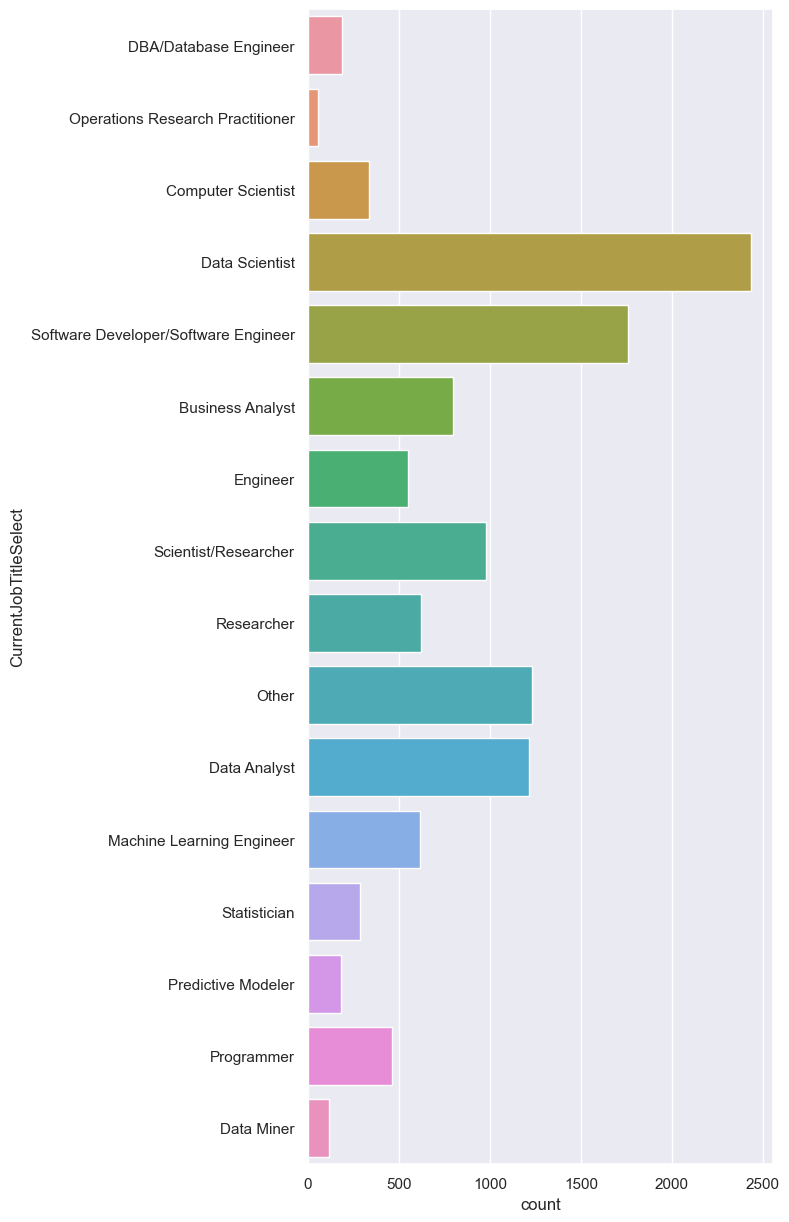

In [23]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(6,15))
ax = sns.countplot(y = 'CurrentJobTitleSelect', data = cat_df)

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

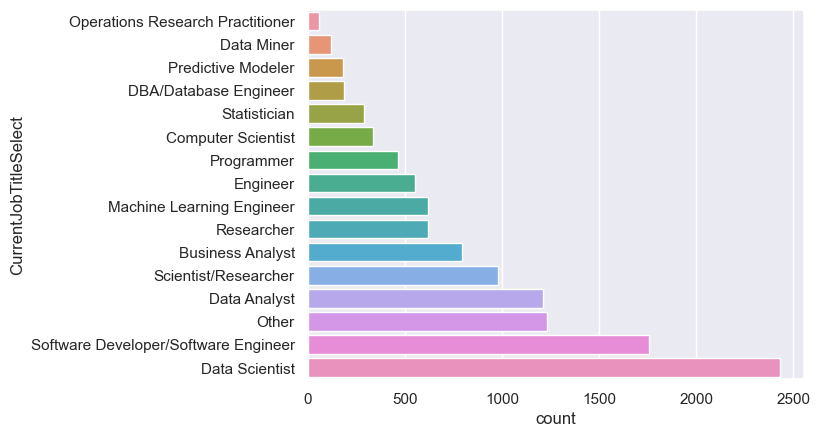

In [25]:
## order by frequency

sns.countplot(y = 'CurrentJobTitleSelect', data = cat_df, order = cat_df['CurrentJobTitleSelect'].value_counts(ascending = True).index)

In [28]:
## Replace Counts with Percentages

title_perc = (cat_df['CurrentJobTitleSelect'].value_counts(normalize = True)
                                             .rename('percentages')
                                             .mul(100)
                                             .rename_axis('CurrentJobTitleSelect')
                                             .reset_index())
title_perc

,CurrentJobTitleSelect,percentages
0,Data Scientist,20.566357
1,Software Developer/Software Engineer,14.868977
2,Other,10.422654
3,Data Analyst,10.253593
4,Scientist/Researcher,8.267117
5,Business Analyst,6.728656
6,Researcher,5.232460
7,Machine Learning Engineer,5.215554
8,Engineer,4.666103
9,Programmer,3.905325


<Axes: xlabel='percentages', ylabel='CurrentJobTitleSelect'>

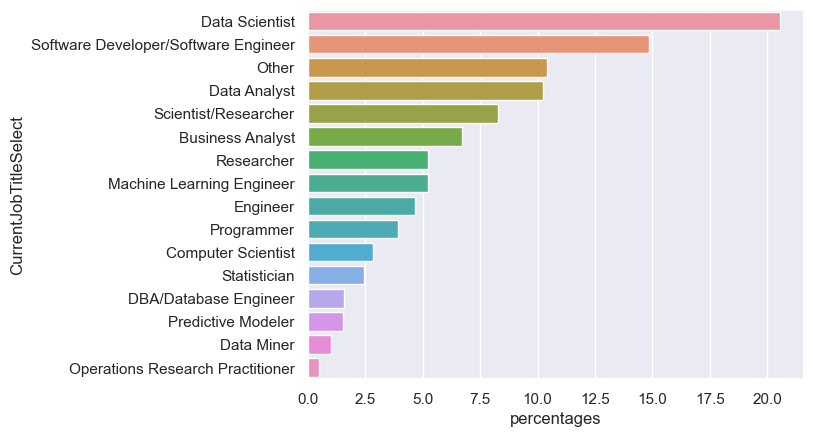

In [31]:
sns.barplot(x='percentages', y = 'CurrentJobTitleSelect', data = title_perc)

## Ordering one variable by another

In [44]:
## Filter for rows where Age and CurrentJob Title both not NA
filter_df = df[(df['CurrentJobTitleSelect'].notnull()) & (df['Age'].notnull())]

## Group the dataset by Currentjobtitle
filter_age_df = filter_df.groupby('CurrentJobTitleSelect')['Age'].mean().sort_values(ascending = False).rename_axis('CurrentJobTitleSelect')
filter_age_df


CurrentJobTitleSelect
Operations Research Practitioner        38.357143
Statistician                            36.944637
DBA/Database Engineer                   36.693989
Other                                   36.036424
Scientist/Researcher                    35.455394
Computer Scientist                      35.133739
Predictive Modeler                      34.785311
Engineer                                34.171846
Researcher                              33.814262
Business Analyst                        33.350384
Data Scientist                          33.310287
Data Miner                              32.991304
Software Developer/Software Engineer    32.833622
Programmer                              31.735099
Data Analyst                            31.555742
Machine Learning Engineer               31.130933
Name: Age, dtype: float64

In [86]:
sns.scatterplot(y='CurrentJobTitleSelect', x= 'Age', data=filter_age_df)

ValueError: Could not interpret value `Age` for parameter `x`

## Maniputlating Categorical Columns


<Axes: xlabel='count', ylabel='WorkInternalVsExternalTools'>

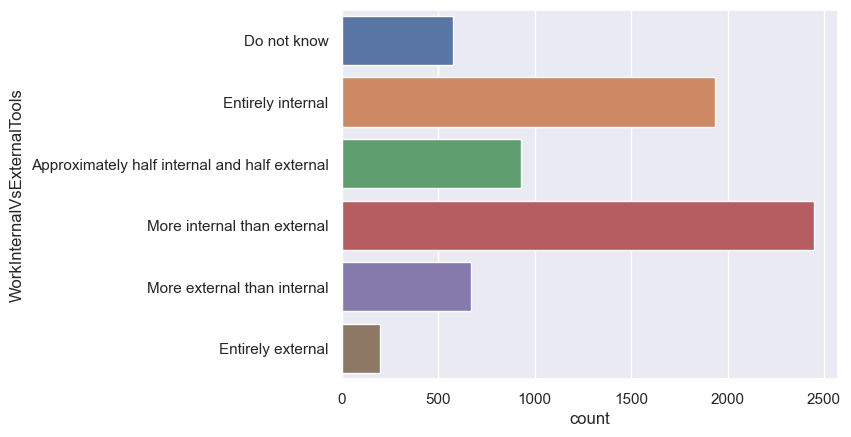

In [46]:
sns.countplot(y = 'WorkInternalVsExternalTools', data= cat_df)

<Axes: xlabel='count', ylabel='WorkInternalVsExternalTools'>

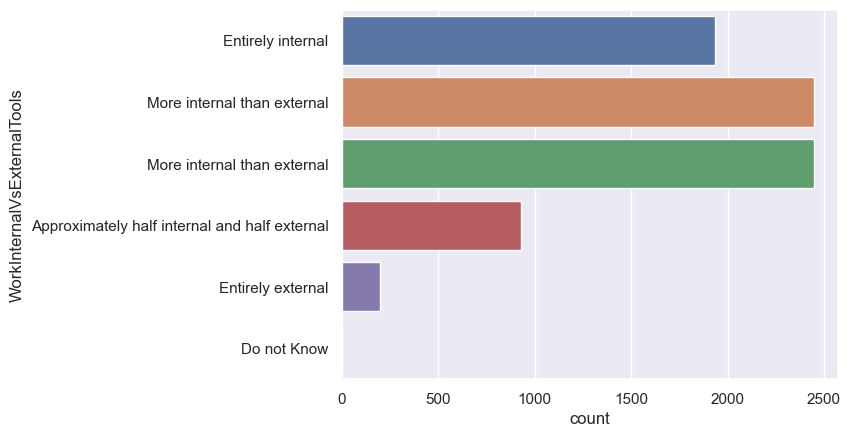

In [47]:
order_list = ['Entirely internal', 'More internal than external', 'More internal than external', 
              'Approximately half internal and half external', 'Entirely external', 'Do not Know']
sns.countplot(y = 'WorkInternalVsExternalTools', data = cat_df, order = order_list)

In [48]:
cat_df['FormalEducation'].fillna('Mising', inplace = True)

In [51]:
##Get unique level from the categorical columns
education_levels = list(set(cat_df['FormalEducation']))
education_levels

['Mising',
 "Bachelor's degree",
 'I did not complete any formal education past high school',
 "Some college/university study without earning a bachelor's degree",
 "Master's degree",
 'I prefer not to answer',
 'Doctoral degree',
 'Professional degree']

In [54]:
## Use insert pop to move elements in a list at a particular index

education_levels.insert(0, education_levels.pop(education_levels.index('I did not complete any formal education past high school')))
education_levels.insert(1, education_levels.pop(education_levels.index("Some college/university study without earning a bachelor's degree")))
education_levels.insert(len(education_levels) -1, education_levels.pop(education_levels.index('Mising')))

education_levels

['I did not complete any formal education past high school',
 "Some college/university study without earning a bachelor's degree",
 "Bachelor's degree",
 "Master's degree",
 'I prefer not to answer',
 'Doctoral degree',
 'Professional degree',
 'Mising']

<Axes: xlabel='count', ylabel='FormalEducation'>

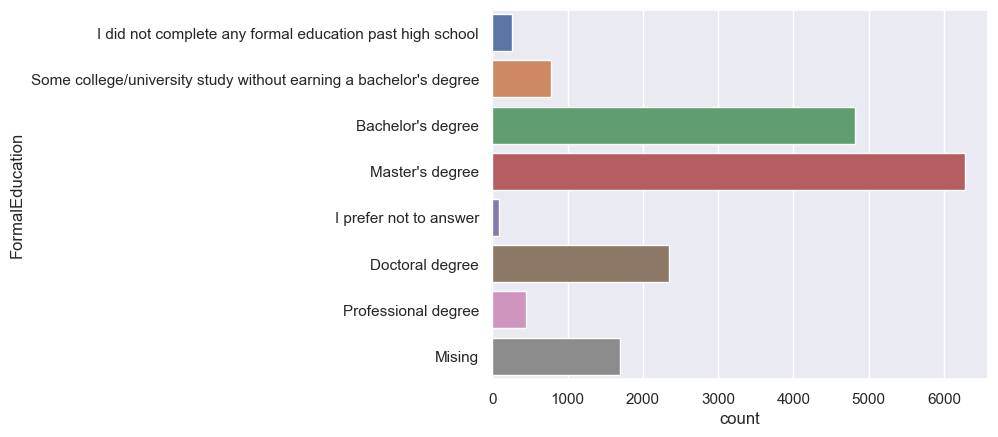

In [55]:
sns.countplot(y= 'FormalEducation', data = cat_df, order = education_levels)

## Renaming categorical column names

In [58]:
flight_df = pd.read_csv('Downloads/datasets_56612_396603_flying-etiquette.csv')
flight_df.head(2)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific


In [64]:
## Rename column
flight_df.rename(columns = {'In a row of three seats, who should get to use the two arm rests?': 'middle_arm_rest_three'}, inplace = True)
flight_df['middle_arm_rest_three'].unique()

array([nan, 'The arm rests should be shared',
       'Whoever puts their arm on the arm rest first',
       'The person in the middle seat gets both arm rests',
       'Other (please specify)',
       'The people in the aisle and window seats get both arm rests'],
      dtype=object)

In [65]:
flight_df['middle_arm_rest_three'].value_counts()

The arm rests should be shared                                 587
The person in the middle seat gets both arm rests              119
Whoever puts their arm on the arm rest first                    87
Other (please specify)                                          45
The people in the aisle and window seats get both arm rests     18
Name: middle_arm_rest_three, dtype: int64

<Axes: xlabel='count', ylabel='middle_arm_rest_three'>

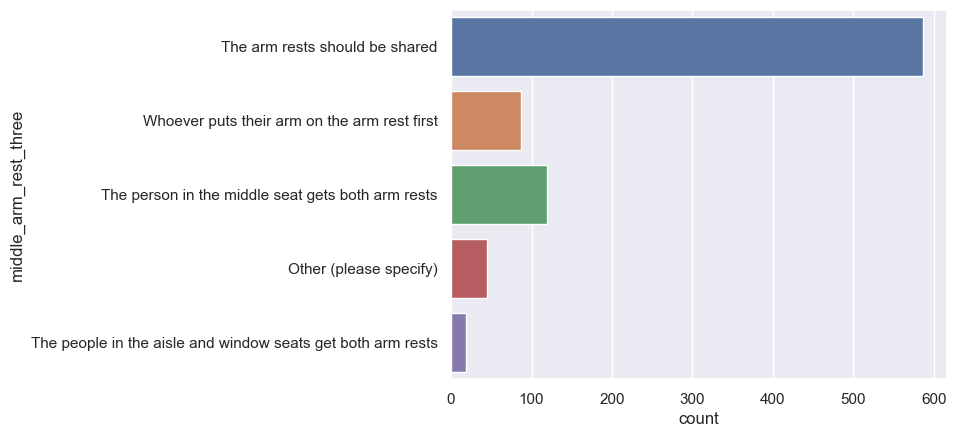

In [66]:
sns.countplot(y = 'middle_arm_rest_three', data = flight_df)

In [68]:
flight_df['middle_arm_rest_three'].replace({'Other (please specify)': 'Others', 
                                            'The arm rests should be shared':'Everyone should share',
                                            'The person in the middle seat gets both arm rests':'Middle Person',
                                           'The people in the aisle and window seats get both arm rests':'IAsle and window people',
                                           'Whoever puts their arm on the arm rest first':'Fastest person'}, inplace = True)

flight_df['middle_arm_rest_three'].unique()

array([nan, 'Everyone should share', 'Fastest person', 'Middle Person',
       'Others', 'IAsle and window people'], dtype=object)

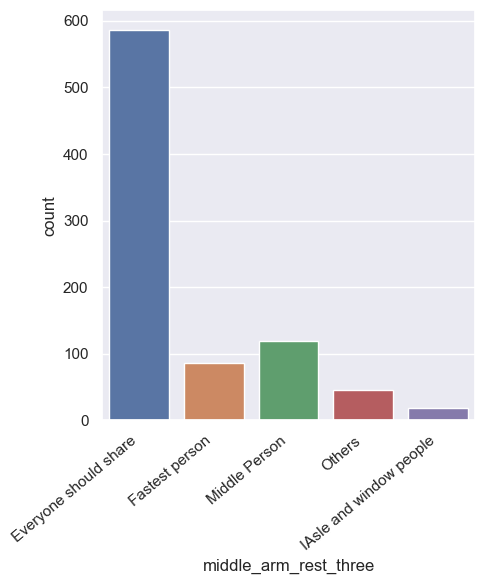

In [71]:
plt.figure(figsize=[5,6])
ax=sns.countplot(x = 'middle_arm_rest_three', data= flight_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')
plt.tight_layout()
plt.show()

## Frequency or percent distribution using pie chart


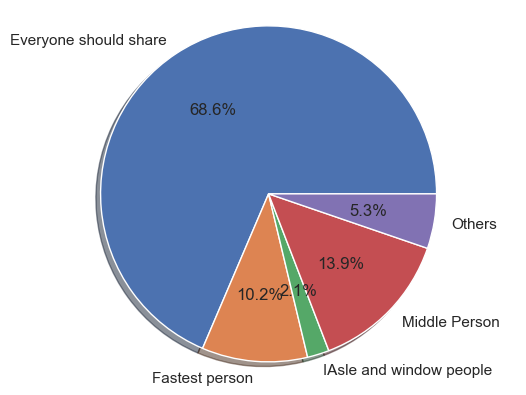

In [75]:
labels  = flight_df['middle_arm_rest_three'].astype('category').cat.categories.tolist()
labels
counts = flight_df['middle_arm_rest_three'].value_counts()
counts
sizes = [counts[var_cat] for var_cat in labels]
sizes
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels =labels, autopct = '%1.1f%%', shadow = True)
ax1.axis('equal')
plt.show()

## Treating Height column 

In [78]:
flight_df.rename(columns = {'How tall are you?':'Height'}, inplace = True)
flight_df['Height'].value_counts(normalize = True)

5'4"              0.092075
5'8"              0.088578
5'7"              0.088578
5'6"              0.087413
5'9"              0.083916
5'5"              0.082751
5'10"             0.078089
6'0"              0.066434
5'11"             0.062937
5'3"              0.055944
5'2"              0.052448
6'2"              0.031469
6'1"              0.030303
5'1"              0.022145
6'3"              0.020979
5'0"              0.019814
Under 5 ft.       0.013986
6'4"              0.012821
6'5"              0.006993
6'6" and above    0.002331
Name: Height, dtype: float64

In [88]:
flight_ht_df = flight_df[['Height']]
levels_to_merge = ['Under 5 ft.','5\'1"','5\'2"','5\'3"','5\'4"','5\'5"']
flight_ht_df['Merged_ht'] = np.where(flight_ht_df['Height'].isin(levels_to_merge),'Under 5\5"', flight_ht_df['Height'])


C:\Users\Ravi\AppData\Local\Temp\ipykernel_3164\1370725251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_ht_df['Merged_ht'] = np.where(flight_ht_df['Height'].isin(levels_to_merge),'Under 5\5"', flight_ht_df['Height'])


In [90]:
ht_freq_prop = flight_ht_df['Merged_ht'].value_counts(normalize = True)

In [93]:
import sys
condition = ht_freq_prop < 0.06
mask_obs = ht_freq_prop[condition].index
mask_dict = dict.fromkeys(mask_obs, 'Other')
flight_ht_df['prop_height'] = flight_ht_df['Height'].replace(mask_dict)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_3164\2656689434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_ht_df['prop_height'] = flight_ht_df['Height'].replace(mask_dict)


In [94]:
flight_ht_df['prop_height'].value_counts(normalize = True)

Other          0.124709
5'4"           0.092075
5'8"           0.088578
5'7"           0.088578
5'6"           0.087413
5'9"           0.083916
5'5"           0.082751
5'10"          0.078089
6'0"           0.066434
5'11"          0.062937
5'3"           0.055944
5'2"           0.052448
5'1"           0.022145
Under 5 ft.    0.013986
Name: prop_height, dtype: float64

In [96]:
top_n = 3
height_freq = flight_ht_df['Height'].value_counts()
mask_obs = height_freq.iloc[top_n:].index
mask_dict = dict.fromkeys(mask_obs,'Other')
flight_ht_df['Top_ht'] = flight_ht_df['Height'].replace(mask_dict)
flight_ht_df['Top_ht'].value_counts()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_3164\292196999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_ht_df['Top_ht'] = flight_ht_df['Height'].replace(mask_dict)


Other    627
5'4"      79
5'8"      76
5'7"      76
Name: Top_ht, dtype: int64

## Creating Factor Variables

In [98]:
df[['WorkChallengeFrequencyExplaining', 'WorkChallengeFrequencyIntegration']].head()

,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyIntegration
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,Often,Often
4,NaN,NaN


In [99]:
work_df = df[df.columns[pd.Series(df.columns).str.startswith('WorkChallengeFrequency')]]
work_df.head()

,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyUnusefulInstrumenting,WorkChallengeFrequencyDeployment,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyPass,WorkChallengeFrequencyIntegration,WorkChallengeFrequencyTalent,WorkChallengeFrequencyDataFunds,...,WorkChallengeFrequencyTools,WorkChallengeFrequencyExpectations,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect
0,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Often,Often,Often,Often,Often,Often,NaN,Often,Often,Often,...,Often,Often,NaN,Often,Often,Often,Often,Often,Often,NaN
4,Often,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,...,NaN,NaN,Sometimes,NaN,Most of the time,NaN,Sometimes,NaN,NaN,NaN


In [106]:
## Use pandas melt function to convert from wide to long by pivoting on index of df

work_melt_df = work_df.reset_index()
work_melt_df = pd.melt(work_melt_df, id_vars = 'index', value_vars = [col for col in work_melt_df.columns if col != 'index'])
work_melt_df.head()

,index,variable,value
0,0,WorkChallengeFrequencyPolitics,Rarely
1,1,WorkChallengeFrequencyPolitics,NaN
2,2,WorkChallengeFrequencyPolitics,NaN
3,3,WorkChallengeFrequencyPolitics,Often
4,4,WorkChallengeFrequencyPolitics,Often


In [111]:
## Drop the index column and name other columns as appropriate
work_melt_df.drop(['index'], axis = 1, inplace = True)
work_melt_df.rename(columns = {'variable':'WorkChallenge', 'value': 'Frequency'}, inplace = True)



KeyError: "['index'] not found in axis"

In [113]:
work_melt_df['WorkChallenge'] = work_melt_df['WorkChallenge'].str.replace('WorkChallengeFrequency', '')
work_melt_df

,WorkChallenge,Frequency
0,Politics,Rarely
1,Politics,NaN
2,Politics,NaN
3,Politics,Often
4,Politics,Often
...,...,...
367747,OtherSelect,NaN
367748,OtherSelect,NaN
367749,OtherSelect,NaN
367750,OtherSelect,NaN


In [114]:
work_melt_df['Frequency'].value_counts()

Often               12714
Sometimes            9185
Most of the time     8504
Rarely               1083
Name: Frequency, dtype: int64

In [116]:
## Remove rows where frequency is na
work_melt_df_nona = work_melt_df[work_melt_df['Frequency'].notnull()]

## Dichotomize Frequency column by marking 1 where it is 'Often' or 'Most of the time'
work_melt_df_nona['Freq_Prob'] = np.where((work_melt_df_nona['Frequency'] == 'Often')|(work_melt_df_nona['Frequency'] == 'Most of the time'),1,0)
work_melt_df_nona

C:\Users\Ravi\AppData\Local\Temp\ipykernel_3164\1103189250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_melt_df_nona['Freq_Prob'] = np.where((work_melt_df_nona['Frequency'] == 'Often')|(work_melt_df_nona['Frequency'] == 'Most of the time'),1,0)


,WorkChallenge,Frequency,Freq_Prob
0,Politics,Rarely,0
3,Politics,Often,1
4,Politics,Often,1
14,Politics,Often,1
15,Politics,Rarely,0
...,...,...,...
366317,OtherSelect,Rarely,0
366405,OtherSelect,Often,1
366844,OtherSelect,Most of the time,1
367334,OtherSelect,Sometimes,0


In [118]:
work_melt_df_nona.groupby(['WorkChallenge'])['Freq_Prob'].mean()

WorkChallenge
Clarity                  0.713630
DataAccess               0.704566
DataFunds                0.643908
Deployment               0.523022
DirtyData                0.830470
DomainExpertise          0.679688
Environments             0.663208
Expectations             0.624339
Explaining               0.604416
HiringFunds              0.730381
ITCoordination           0.713430
Integration              0.625514
ML                       0.606536
OtherSelect              0.758123
Pass                     0.445755
Politics                 0.661194
Privacy                  0.609705
Scaling                  0.630252
Talent                   0.708611
Tools                    0.623410
UnusedResults            0.594037
UnusefulInstrumenting    0.560250
Name: Freq_Prob, dtype: float64